# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Network Analysis
> Author: Matt Brems (DC)

In [9]:
# Uncomment to install Bokeh/NetworkX.
# !pip install bokeh networkx --upgrade

# Import NetworkX with the alias "nx."
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### NetworkX Library

In Python, the [NetworkX library](https://networkx.github.io/) is one that will allow us to plot and manipulate graphs.

In [10]:
# Instantiate a graph object as "g".
g = nx.Graph()

In [11]:
# Create nodes 'a' and 'b', then add an edge between them.
g.add_edge('a','b')

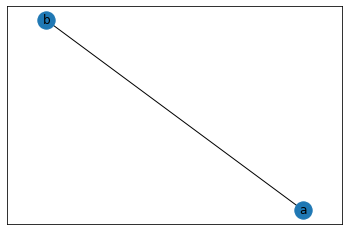

In [12]:
# Draw the network.
nx.draw_networkx(g);

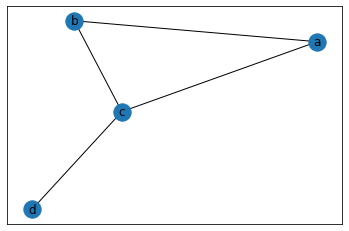

In [13]:
# Add nodes 'c' and 'd' and create edges among them.
g.add_edge('b','c')
g.add_edge('a','c')
g.add_edge('c','d')

# Draw the network.
nx.draw_networkx(g);

In [14]:
print(nx.shortest_path(g,'b','d'))

['b', 'c', 'd']


In [15]:
nx.shortest_path_length(g,'b','d')

2

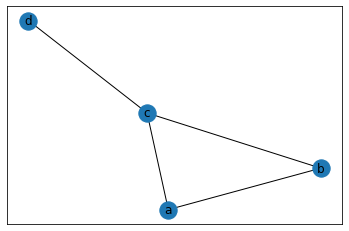

In [16]:
# Add additional edge between 'a' and 'b'.
g.add_edge('a','b')

# Draw the network.
nx.draw_networkx(g);

### Seven Bridges of Königsberg

In [18]:
# Instantiate a multigraph object as "seven_bridges".
seven_bridges = nx.MultiGraph()

In [19]:
# Create all seven bridges at once!
seven_bridges.add_edges_from([('A','B'),
                              ('A','B'),
                              ('A','C'),
                              ('B','C'),
                              ('B','D'),
                              ('B','D'),
                              ('C','D')])

[0, 1, 0, 0, 0, 1, 0]

In [20]:
# Create adjacency matrix for Seven Bridges problem.
nx.adjacency_matrix(seven_bridges).toarray()

array([[0, 2, 1, 0],
       [2, 0, 1, 2],
       [1, 1, 0, 1],
       [0, 2, 1, 0]], dtype=int64)

In [12]:
# Check to see if each bridge can be traveled exactly once.
nx.is_eulerian(seven_bridges)  #to find if can cross not

False

In [13]:
# Is seven_bridges isomorphic to g?
nx.is_isomorphic(g,seven_bridges)

False

In [14]:
# Is seven_bridges isomorphic to seven_bridges?
nx.is_isomorphic(seven_bridges, seven_bridges)

True

### Trivia: Kuratowski's Theorem
[Kuratowski's Theorem](https://en.wikipedia.org/wiki/Kuratowski%27s_theorem) states that a network is non-planar if and only if a network contains $K_5$ or $K_{3,3}$.

In [21]:
# Generate the complete graph on five nodes.
k_5 = nx.complete_graph(5)

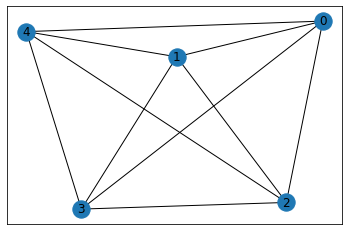

In [28]:
# Draw the network.
nx.draw_networkx(k_5);

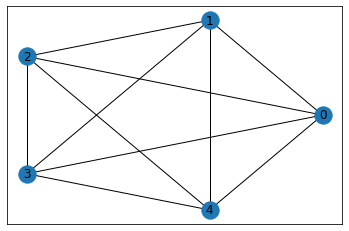

In [23]:
# Draw the network with a specific layout.
nx.draw_networkx(k_5, pos=nx.circular_layout(k_5));

You may have seen $K_{3,3}$ before as part of the [three utilities problem](https://en.wikipedia.org/wiki/Three_utilities_problem).

In [18]:
# Generate the complete bipartite graph on three nodes and three nodes.
k_3_3 = nx.complete_multipartite_graph(3,3)

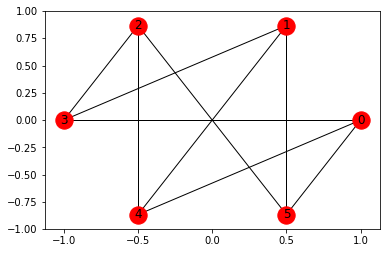

In [19]:
# Draw the network with a specific layout.
nx.draw_networkx(k_3_3, pos=nx.circular_layout(k_3_3));

## Bokeh!

In [29]:
from bokeh.io import show, output_notebook
from bokeh.models import Plot, Range1d, MultiLine, Circle, HoverTool, TapTool, BoxSelectTool
from bokeh.models.graphs import from_networkx, NodesAndLinkedEdges, EdgesAndLinkedNodes
from bokeh.palettes import Spectral4

### Let's create a graph for us to play with. (This is [Zachary's Karate Club](https://en.wikipedia.org/wiki/Zachary%27s_karate_club).)

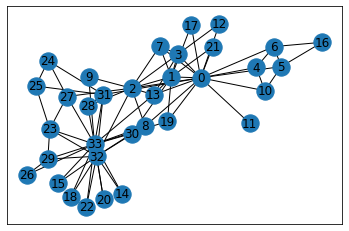

In [30]:
# Instantiate karate club graph object.
G = nx.karate_club_graph()

# Draw network.
nx.draw_networkx(G);

### This is messy - let's clean it up.

In [32]:
# Create graph.
G = nx.karate_club_graph()

# Create plot range. (x and y values, plus how large the plot visually is)
plot = Plot(plot_width=400,
            plot_height=400,
            x_range=Range1d(-1.1,1.1),
            y_range=Range1d(-1.1,1.1))

# Create title.
plot.title.text = "Graph Interaction Demonstration"

# NetworkX --> Bokeh.
graph_renderer = from_networkx(G,
                               nx.circular_layout,
                               scale=1,
                               center=(0,0))

# Render our plot.
plot.renderers.append(graph_renderer)

# Output this in a notebook.
output_notebook()
show(plot)

Loading BokehJS ...

### Alright... this is clean, but it's uninformative and is uninteresting.

In [33]:
# Create graph.
G = nx.karate_club_graph()

# Create plot range. (x and y values, plus how large the plot visually is)
plot = Plot(plot_width=400,
            plot_height=400,
            x_range=Range1d(-1.1,1.1),
            y_range=Range1d(-1.1,1.1))

# Create title.
plot.title.text = "Graph Interaction Demonstration"

# NetworkX --> Bokeh.
graph_renderer = from_networkx(G,
                               nx.circular_layout,
                               scale=1,
                               center=(0,0))

### NEW LINE
# Let's color the nodes.
graph_renderer.node_renderer.glyph = Circle(size=15, fill_color=Spectral4[0])
graph_renderer.node_renderer.selection_glyph = Circle(size=15, fill_color=Spectral4[2])
graph_renderer.node_renderer.hover_glyph = Circle(size=15, fill_color=Spectral4[1])

# Render our plot.
plot.renderers.append(graph_renderer)

# Output this in a notebook.
output_notebook()
show(plot)

Loading BokehJS ...

### And again....

In [34]:
# Create graph.
G = nx.karate_club_graph()

# Create plot range. (x and y values, plus how large the plot visually is)
plot = Plot(plot_width=400,
            plot_height=400,
            x_range=Range1d(-1.1,1.1),
            y_range=Range1d(-1.1,1.1))

# Create title.
plot.title.text = "Graph Interaction Demonstration"

# NetworkX --> Bokeh.
graph_renderer = from_networkx(G,
                               nx.circular_layout,
                               scale=1,
                               center=(0,0))

# Let's color the nodes.
graph_renderer.node_renderer.glyph = Circle(size=15, fill_color=Spectral4[0])
graph_renderer.node_renderer.selection_glyph = Circle(size=15, fill_color=Spectral4[2])
graph_renderer.node_renderer.hover_glyph = Circle(size=15, fill_color=Spectral4[1])

### NEW LINE
# Let's color the edges.
graph_renderer.edge_renderer.glyph = MultiLine(line_color="#CCCCCC", line_alpha=0.8, line_width=5)
graph_renderer.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width=5)
graph_renderer.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[1], line_width=5)

# Render our plot.
plot.renderers.append(graph_renderer)

# Output this in a notebook.
output_notebook()
show(plot)

Loading BokehJS ...

### Let's make it interactive!

In [35]:
# Create graph.
G = nx.karate_club_graph()

# Create plot range. (x and y values, plus how large the plot visually is)
plot = Plot(plot_width=400,
            plot_height=400,
            x_range=Range1d(-1.1,1.1),
            y_range=Range1d(-1.1,1.1))

# Create title.
plot.title.text = "Graph Interaction Demonstration"

### NEW LINE
# Add tools!
# Specifically, we want to be able to hover over items, tap on items, and select with a drag-and-drop box!
plot.add_tools(HoverTool(tooltips=None), TapTool(), BoxSelectTool())

# Learan more about tools and customizing plots: https://bokeh.pydata.org/en/latest/docs/user_guide/tools.html

# NetworkX --> Bokeh.
graph_renderer = from_networkx(G,
                               nx.circular_layout,
                               scale=1,
                               center=(0,0))

# Let's color the nodes.
graph_renderer.node_renderer.glyph = Circle(size=15, fill_color=Spectral4[0])
graph_renderer.node_renderer.selection_glyph = Circle(size=15, fill_color=Spectral4[2])
graph_renderer.node_renderer.hover_glyph = Circle(size=15, fill_color=Spectral4[1])

# Let's color the edges.
graph_renderer.edge_renderer.glyph = MultiLine(line_color="#CCCCCC", line_alpha=0.8, line_width=5)
graph_renderer.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width=5)
graph_renderer.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[1], line_width=5)

### NEW LINE
# When selecting items with our tools above, what do we select/inspect?
graph_renderer.selection_policy = NodesAndLinkedEdges()
graph_renderer.inspection_policy = EdgesAndLinkedNodes()

# Render our plot.
plot.renderers.append(graph_renderer)

# Output this in a notebook.
output_notebook()
show(plot)

Loading BokehJS ...

### Let's export this as an .html file!

In [36]:
from bokeh.io import output_file

In [37]:
# Create graph.
G = nx.karate_club_graph()

# Create plot range. (x and y values, plus how large the plot visually is)
plot = Plot(plot_width=400,
            plot_height=400,
            x_range=Range1d(-1.1,1.1),
            y_range=Range1d(-1.1,1.1))

# Create title.
plot.title.text = "Graph Interaction Demonstration"

# Add tools!
# Specifically, we want to be able to hover over items, tap on items, and select with a drag-and-drop box!
plot.add_tools(HoverTool(tooltips=None), TapTool(), BoxSelectTool())

# NetworkX --> Bokeh.
graph_renderer = from_networkx(G,
                               nx.circular_layout,
                               scale=1,
                               center=(0,0))

# Let's color the nodes.
graph_renderer.node_renderer.glyph = Circle(size=15, fill_color=Spectral4[0])
graph_renderer.node_renderer.selection_glyph = Circle(size=15, fill_color=Spectral4[2])
graph_renderer.node_renderer.hover_glyph = Circle(size=15, fill_color=Spectral4[1])

# Let's color the edges.
graph_renderer.edge_renderer.glyph = MultiLine(line_color="#CCCCCC", line_alpha=0.8, line_width=5)
graph_renderer.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width=5)
graph_renderer.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[1], line_width=5)

# When selecting items with our tools above, what do we select/inspect?
graph_renderer.selection_policy = NodesAndLinkedEdges()
graph_renderer.inspection_policy = EdgesAndLinkedNodes()

# Render our plot.
plot.renderers.append(graph_renderer)

### EDITED LINE
# Output these in a separate webpage!
output_file("random_graph.html")
show(plot)